# Apple Vision Pro Sentiment Analysis [ Data Extraction & EDA]

In [2]:
import praw
import pandas as pd
import numpy as np
import re
import string
import nltk
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize

In [3]:
#nltk.download('punkt')

In [4]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reddit API Call

In [6]:
client_id = 'TKGen0R23aOTyBPdhx8WAw'
client_secret = '989soce2TfekvkQiSQbPQhJ9a529hQ'
user_agent = 'my_app'

# Create Reddit instance
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

# Subreddit to fetch data from
subreddit_name = "AppleVisionPro"
subreddit = reddit.subreddit(subreddit_name)

# Number of top posts to retrieve
post_limit = 60

# Create an empty DataFrame
reddit_data = pd.DataFrame(columns=['Title', 'Author', 'ID', 'Created'])

# Retrieve top posts
top_posts = subreddit.top(limit=post_limit)

# Iterate through top posts
for post in top_posts:
    # Extract post title
    post_title = post.title

    # Extract post author
    post_author = post.author.name if post.author else None

    # Add data to DataFrame
    reddit_data = reddit_data.append({
        'Title': post_title,
        'Author': post_author,
        'ID': post.id,
        'Created': pd.to_datetime(post.created_utc, unit='s')
    }, ignore_index=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_15336\3920941595.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reddit_data = reddit_data.append({
C:\Users\Hp\AppData\Local\Temp\ipykernel_15336\3920941595.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reddit_data = reddit_data.append({
C:\Users\Hp\AppData\Local\Temp\ipykernel_15336\3920941595.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reddit_data = reddit_data.append({
C:\Users\Hp\AppData\Local\Temp\ipykernel_15336\3920941595.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reddit_data = reddit_data.append({
C:\Users\Hp\AppData\Local\Temp\ipykernel_15336\3920941595.py

C:\Users\Hp\AppData\Local\Temp\ipykernel_15336\3920941595.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reddit_data = reddit_data.append({
C:\Users\Hp\AppData\Local\Temp\ipykernel_15336\3920941595.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reddit_data = reddit_data.append({
C:\Users\Hp\AppData\Local\Temp\ipykernel_15336\3920941595.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reddit_data = reddit_data.append({
C:\Users\Hp\AppData\Local\Temp\ipykernel_15336\3920941595.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reddit_data = reddit_data.append({
C:\Users\Hp\AppData\Local\Temp\ipykernel_15336\3920941595.py

In [7]:
reddit_data.head()

,Title,Author,ID,Created
0,It’s too expensive. No regrets.,McNerdsAlot,1akdyzo,2024-02-06 16:35:52
1,Absolutely Magical... No Other Words For It,thomaspripley,1ahmtcu,2024-02-03 03:46:26
2,I was REALLY wrong about the AVP. This is the ...,AppleBottmBeans,1amtycf,2024-02-09 17:45:25
3,Best new product I’ve ever seen,Sea_Astronomer_994,1am800c,2024-02-08 22:19:35
4,You know what I mean,the_DDDom,141q6pm,2023-06-05 20:09:32


In [8]:
len(reddit_data)

60

In [9]:
reddit_data.tail()

,Title,Author,ID,Created
55,Vision Pro blurriness (kind of) explained,forcetrainer,1ainmo1,2024-02-04 13:14:35
56,"I’m glad AVP exists, but I’m returning it",chaospet,1ahyisd,2024-02-03 15:25:24
57,Pros and Cons Quick Take,TechGuy4747,1ahkh96,2024-02-03 01:45:30
58,OMG!!! What an incredible experience so far fo...,cr8tvt,1ahious,2024-02-03 00:17:20
59,Reviewers holding back ?,Slight-Alarm-349,1agm3i4,2024-02-01 21:25:17


In [10]:
reddit_data['Title'].dtype

dtype('O')

In [11]:
reddit_data['Original_Title'] = reddit_data['Title']

# Lower Case

In [12]:
reddit_data['Title'] = reddit_data['Title'].str.lower()

In [13]:
reddit_data.head()

,Title,Author,ID,Created,Original_Title
0,it’s too expensive. no regrets.,McNerdsAlot,1akdyzo,2024-02-06 16:35:52,It’s too expensive. No regrets.
1,absolutely magical... no other words for it,thomaspripley,1ahmtcu,2024-02-03 03:46:26,Absolutely Magical... No Other Words For It
2,i was really wrong about the avp. this is the ...,AppleBottmBeans,1amtycf,2024-02-09 17:45:25,I was REALLY wrong about the AVP. This is the ...
3,best new product i’ve ever seen,Sea_Astronomer_994,1am800c,2024-02-08 22:19:35,Best new product I’ve ever seen
4,you know what i mean,the_DDDom,141q6pm,2023-06-05 20:09:32,You know what I mean


# Remove Digits & Special Characters

In [14]:
def remove_special_chars_and_numbers(s):
    return re.sub('[^A-Za-z\s]', '', str(s))

In [15]:
reddit_data['Title'] = reddit_data['Title'].apply(lambda x: remove_special_chars_and_numbers(str(x)))

In [16]:
reddit_data.head()

,Title,Author,ID,Created,Original_Title
0,its too expensive no regrets,McNerdsAlot,1akdyzo,2024-02-06 16:35:52,It’s too expensive. No regrets.
1,absolutely magical no other words for it,thomaspripley,1ahmtcu,2024-02-03 03:46:26,Absolutely Magical... No Other Words For It
2,i was really wrong about the avp this is the m...,AppleBottmBeans,1amtycf,2024-02-09 17:45:25,I was REALLY wrong about the AVP. This is the ...
3,best new product ive ever seen,Sea_Astronomer_994,1am800c,2024-02-08 22:19:35,Best new product I’ve ever seen
4,you know what i mean,the_DDDom,141q6pm,2023-06-05 20:09:32,You know what I mean


# Text Tokenization

In [17]:
def tokenize_text(text):
    return word_tokenize(text)

In [18]:
reddit_data['Title'] = reddit_data['Title'].apply(lambda x: tokenize_text(x))

In [19]:
reddit_data.head()

,Title,Author,ID,Created,Original_Title
0,"[its, too, expensive, no, regrets]",McNerdsAlot,1akdyzo,2024-02-06 16:35:52,It’s too expensive. No regrets.
1,"[absolutely, magical, no, other, words, for, it]",thomaspripley,1ahmtcu,2024-02-03 03:46:26,Absolutely Magical... No Other Words For It
2,"[i, was, really, wrong, about, the, avp, this,...",AppleBottmBeans,1amtycf,2024-02-09 17:45:25,I was REALLY wrong about the AVP. This is the ...
3,"[best, new, product, ive, ever, seen]",Sea_Astronomer_994,1am800c,2024-02-08 22:19:35,Best new product I’ve ever seen
4,"[you, know, what, i, mean]",the_DDDom,141q6pm,2023-06-05 20:09:32,You know what I mean


# Remove Stop Words

In [20]:
stop = stopwords.words('english')

In [21]:
reddit_data['Without_stopwords'] = reddit_data['Title'].apply(lambda x: [item for item in x if item not in stop])

In [22]:
reddit_data.head()

,Title,Author,ID,Created,Original_Title,Without_stopwords
0,"[its, too, expensive, no, regrets]",McNerdsAlot,1akdyzo,2024-02-06 16:35:52,It’s too expensive. No regrets.,"[expensive, regrets]"
1,"[absolutely, magical, no, other, words, for, it]",thomaspripley,1ahmtcu,2024-02-03 03:46:26,Absolutely Magical... No Other Words For It,"[absolutely, magical, words]"
2,"[i, was, really, wrong, about, the, avp, this,...",AppleBottmBeans,1amtycf,2024-02-09 17:45:25,I was REALLY wrong about the AVP. This is the ...,"[really, wrong, avp, incredible, piece, tech, ..."
3,"[best, new, product, ive, ever, seen]",Sea_Astronomer_994,1am800c,2024-02-08 22:19:35,Best new product I’ve ever seen,"[best, new, product, ive, ever, seen]"
4,"[you, know, what, i, mean]",the_DDDom,141q6pm,2023-06-05 20:09:32,You know what I mean,"[know, mean]"


# Lemmatization

In [23]:
#nltk.download('wordnet')

In [24]:
lemmatizer = WordNetLemmatizer()

In [25]:
def lemmatize_text(text):
    if isinstance(text, str):  # Check if the value is a string
        words = word_tokenize(text)
        filtered_words = [word for word in words if word.lower() not in stop_words]
        lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
        return ' '.join(lemmatized_words)
    else:
        return str(text) 

In [26]:
reddit_data['Lemmatized Words'] = reddit_data['Without_stopwords'].apply(lemmatize_text)

In [27]:
reddit_data.head(8)

,Title,Author,ID,Created,Original_Title,Without_stopwords,Lemmatized Words
0,"[its, too, expensive, no, regrets]",McNerdsAlot,1akdyzo,2024-02-06 16:35:52,It’s too expensive. No regrets.,"[expensive, regrets]","['expensive', 'regrets']"
1,"[absolutely, magical, no, other, words, for, it]",thomaspripley,1ahmtcu,2024-02-03 03:46:26,Absolutely Magical... No Other Words For It,"[absolutely, magical, words]","['absolutely', 'magical', 'words']"
2,"[i, was, really, wrong, about, the, avp, this,...",AppleBottmBeans,1amtycf,2024-02-09 17:45:25,I was REALLY wrong about the AVP. This is the ...,"[really, wrong, avp, incredible, piece, tech, ...","['really', 'wrong', 'avp', 'incredible', 'piec..."
3,"[best, new, product, ive, ever, seen]",Sea_Astronomer_994,1am800c,2024-02-08 22:19:35,Best new product I’ve ever seen,"[best, new, product, ive, ever, seen]","['best', 'new', 'product', 'ive', 'ever', 'seen']"
4,"[you, know, what, i, mean]",the_DDDom,141q6pm,2023-06-05 20:09:32,You know what I mean,"[know, mean]","['know', 'mean']"
5,"[its, happening, over, native, apps, launch, f...",SpenceHere,1aggfhi,2024-02-01 17:28:27,It’s happening! Over 600 native apps @ launch ...,"[happening, native, apps, launch, apple, visio...","['happening', 'native', 'apps', 'launch', 'app..."
6,"[avp, was, my, first, apple, device, ever]",firebird8541154,1ajlhkk,2024-02-05 17:04:51,AVP Was My First Apple Device Ever!,"[avp, first, apple, device, ever]","['avp', 'first', 'apple', 'device', 'ever']"
7,"[dear, tim]",SnooMacarons5173,197rsvv,2024-01-16 02:42:19,"Dear Tim,","[dear, tim]","['dear', 'tim']"


# EDA

## Number of Characters in each review title

<AxesSubplot:>

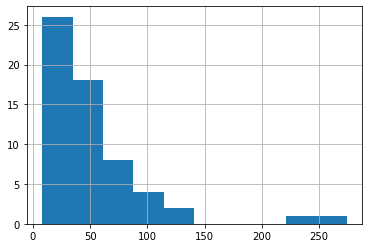

In [25]:
reddit_data['Original_Title'].str.len().hist()

### The histogram shows that review titles range from 10 to 300 characters and generally, it is between 10 to 140 characters.

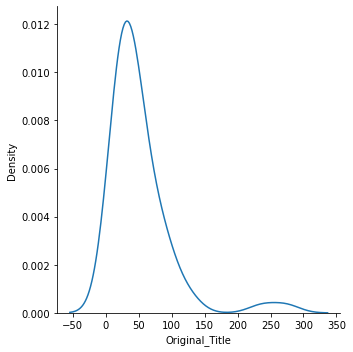

In [29]:
sns.displot(reddit_data['Original_Title'].str.len(), kind="kde")

### We can observe that the number of characters follow a multimodal distribution where the first peak is centered around 40 and the second peak around 255.

## Word Length Analysis: 

### Shows the number of words appearing in each line

<AxesSubplot:>

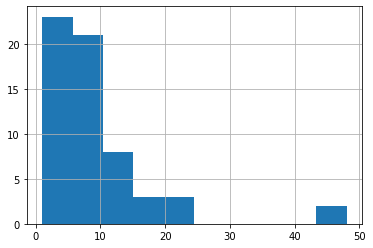

In [36]:
reddit_data['Original_Title'].str.split().map(lambda x: len(x)).hist()

## It is clear that the number of words in review title ranges from 2 to 47 and mostly falls between 2 to 24 words.

# Average Word Length

<AxesSubplot:>

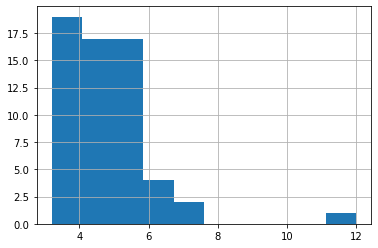

In [34]:
reddit_data['Original_Title'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

### The average word length ranges between 2 to 12 with 3-4 being the most common length.

# Q1.  Does this means people like writing short titles for their reviews. (above)

# Top Stop Words

In [39]:
corpus=[]
new= reddit_data['Original_Title'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [40]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

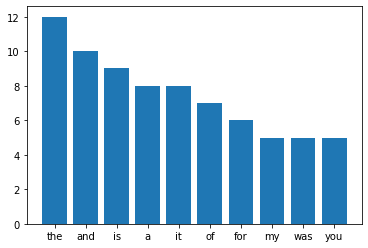

In [43]:
plot_top_stopwords_barchart(reddit_data['Original_Title'])

### From the above graph, we can see that the top 3 stopwords used in the title are 'THE', 'AND' & 'IS'.

## We know which stopwords occur frequently in our text, let’s inspect which words other than these stopwords occur frequently.

<AxesSubplot:>

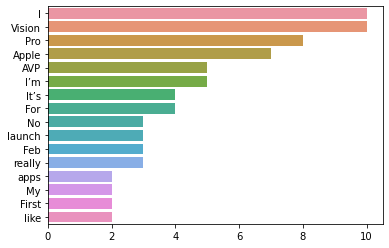

In [45]:
from collections import Counter

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

## So, we can see that "I","Vision" & "Pro" are the most frequently used non stopwords used.

# Let's find the top Bigrams

In [51]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

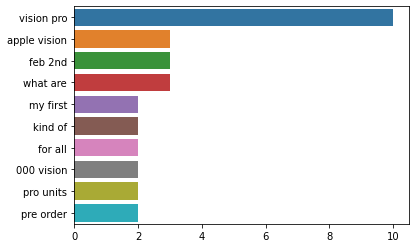

In [55]:
plot_top_ngrams_barchart(reddit_data['Original_Title'],2)

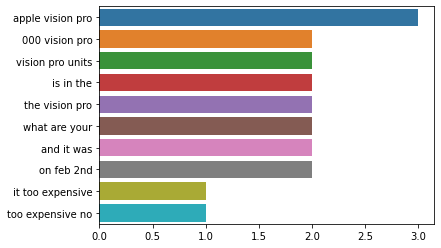

In [56]:
plot_top_ngrams_barchart(reddit_data['Original_Title'],3)

In [75]:
#pip install wordcloud

In [93]:
# Is there any User who provided multiple comments



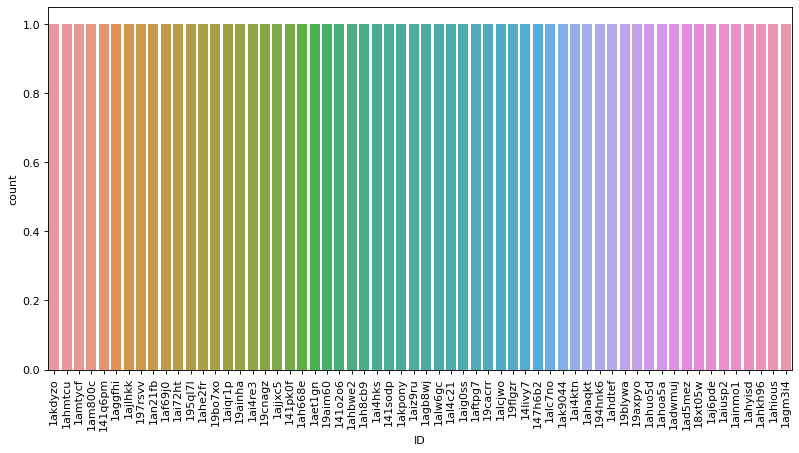

In [31]:
plt.figure(figsize=(12, 6), dpi=80)
sns.countplot(x="ID", data=reddit_data)
plt.xticks(rotation=90) 
plt.show()

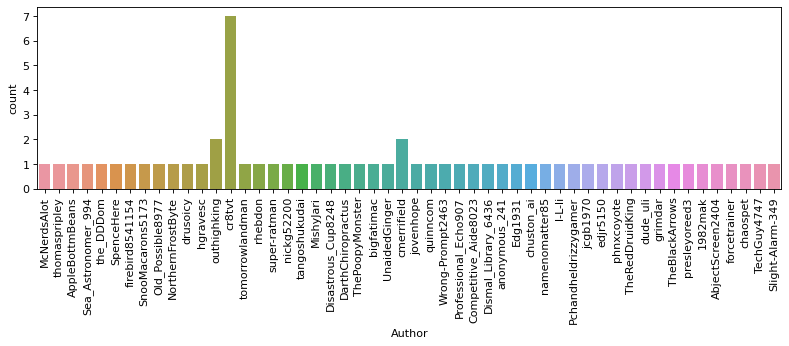

In [33]:
plt.figure(figsize=(12, 3), dpi=80)
sns.countplot(x="Author", data=reddit_data)
plt.xticks(rotation=90) 
plt.show()